<a href="https://colab.research.google.com/github/ohhparkash/EDA-and-Visualization-of-Real-World-Dataset/blob/main/EDA_and_Visualization_of_Real_World_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Understanding and Gathering info for the datset

In [53]:
dataset.info()
dataset.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 7518 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7518 non-null   object        
 1   type          7518 non-null   object        
 2   title         7518 non-null   object        
 3   director      7518 non-null   object        
 4   cast          7518 non-null   object        
 5   country       7518 non-null   object        
 6   date_added    7518 non-null   datetime64[ns]
 7   release_year  7518 non-null   int64         
 8   rating        7518 non-null   object        
 9   duration      7518 non-null   object        
 10  listed_in     7518 non-null   object        
 11  description   7518 non-null   object        
 12  duration_num  7518 non-null   int64         
 13  year_added    7518 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(10)
memory usage: 851.6+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,year_added
count,7518,7518,7518,7518,7518,7518,7518,7518.000000,7518,7518,7518,7518,7518.000000,7518.000000
unique,7518,2,7518,3992,6478,674,NaN,NaN,17,194,450,7491,NaN,NaN
top,s8807,Movie,Zubaan,Unknown,Unknown,United States,NaN,NaN,TV-MA,1 Season,Documentaries,"Paranormal activity at a lush, abandoned prope...",NaN,NaN
freq,1,5075,1,2405,785,2296,NaN,NaN,3020,1704,340,4,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-22 19:59:48.507581952,2016.944932,NaN,NaN,NaN,NaN,65.767890,2018.887603
min,NaN,NaN,NaN,NaN,NaN,NaN,2014-10-10 00:00:00,2009.000000,NaN,NaN,NaN,NaN,1.000000,2014.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-06 00:00:00,2015.000000,NaN,NaN,NaN,NaN,2.000000,2018.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-22 00:00:00,2017.000000,NaN,NaN,NaN,NaN,86.000000,2019.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-20 00:00:00,2019.000000,NaN,NaN,NaN,NaN,103.000000,2020.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,2021.000000,NaN,NaN,NaN,NaN,212.000000,2021.000000


Step 2: Exploring the dataset.

In [54]:
import pandas as pd
dataset = pd.read_csv('netflix_titles.csv')
dataset.head(5)
dataset.index
dataset.dtypes
dataset.shape

(8807, 12)

Step 3: Cleaning the dataset.

In [55]:
#determining all the null values in dataset
missingValues = dataset.isnull().sum()
(missingValues / dataset.shape[0]) * 100


,0
show_id,0.000000
type,0.000000
title,0.000000
director,29.908028
cast,9.367549
country,9.435676
date_added,0.113546
release_year,0.000000
rating,0.045418
duration,0.034064


In [56]:
#determining the total percentage of the entire null data in dataset
(dataset.isnull().sum().sum()/(dataset.shape[0]*dataset.shape[1]))*100

np.float64(4.075356723818175)

In [58]:
#filling up the null cells in 'director', 'cast' and 'country' coloumns
dataset['director'].fillna('Unknown', inplace=True)
dataset['cast'].fillna('Unknown', inplace=True)
dataset['country'].fillna('Unknown', inplace=True)

In [ ]:
#filling up 'date_added' with forward filling
dataset['date_added'].fillna(method='ffill', inplace=True)

<ipython-input-15-5b84d0787db2>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset['date_added'].fillna(method='ffill', inplace=True)


In [ ]:
#filling up 'rating' and 'duration' with mode filling
dataset['rating'].fillna(dataset['rating'].mode()[0], inplace=True)
dataset['duration'].fillna(dataset['duration'].mode()[0], inplace=True)

In [59]:
#determining duplicates in the dataset
dataset.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
8802,False
8803,False
8804,False
8805,False


In [60]:
#dropping the duplicated data found in dataset
dataset.drop_duplicates(inplace=True)

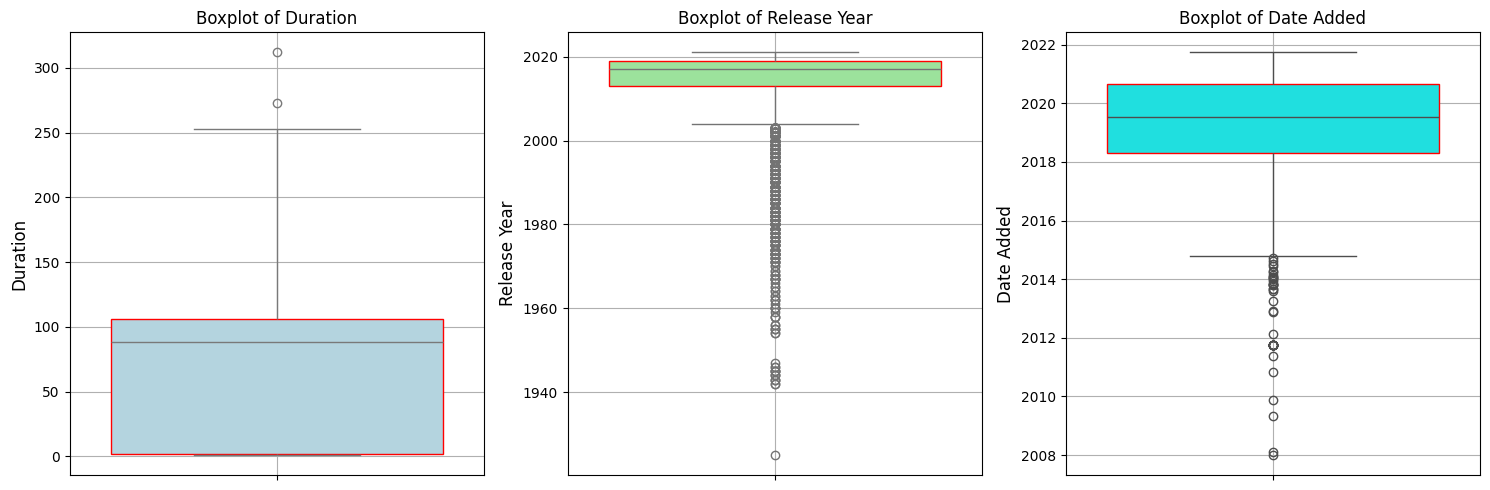

In [61]:
#Determining Outliers in 'duration', 'date_added' and 'release_year' by creating boxplots
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Converting duration to numeric
def extract_duration(val):
  if pd.isnull(val):
    return np.nan
  if 'min' in val:
    return int(val.replace(' min', ''))
  elif 'Season' in val:
    return int(val.split()[0])
  else:
    return np.nan

dataset['duration_num'] = dataset['duration'].apply(extract_duration)

#Converting date_added to datetime
dataset['date_added'] = pd.to_datetime(dataset['date_added'], errors='coerce')

#Extracting year from date_added because we only need to look for that
dataset['year_added'] = dataset['date_added'].dt.year


plt.figure(figsize=(15, 5))

#First Boxplot (For Duration)
plt.subplot(1, 3, 1)
sns.boxplot(y='duration_num', data=dataset, color='lightblue', boxprops=dict(edgecolor='red'))
plt.title('Boxplot of Duration', fontsize=12)
plt.ylabel('Duration', fontsize=12)
plt.grid(True)

#Second Boxplot (for Release Year)
plt.subplot(1, 3, 2)
sns.boxplot(y='release_year', data=dataset, color='lightgreen', boxprops=dict(edgecolor='red'))
plt.title('Boxplot of Release Year', fontsize=12)
plt.ylabel('Release Year', fontsize=12)
plt.grid(True)

#Third Boxplot (for Date added)
plt.subplot(1, 3, 3)
sns.boxplot(y='date_added', data=dataset, color='cyan', boxprops=dict(edgecolor='red'))
plt.title('Boxplot of Date Added', fontsize=12)
plt.ylabel('Date Added', fontsize=12)
plt.grid(True)

# Adjusting spacing and showing plot
plt.tight_layout()
plt.show()


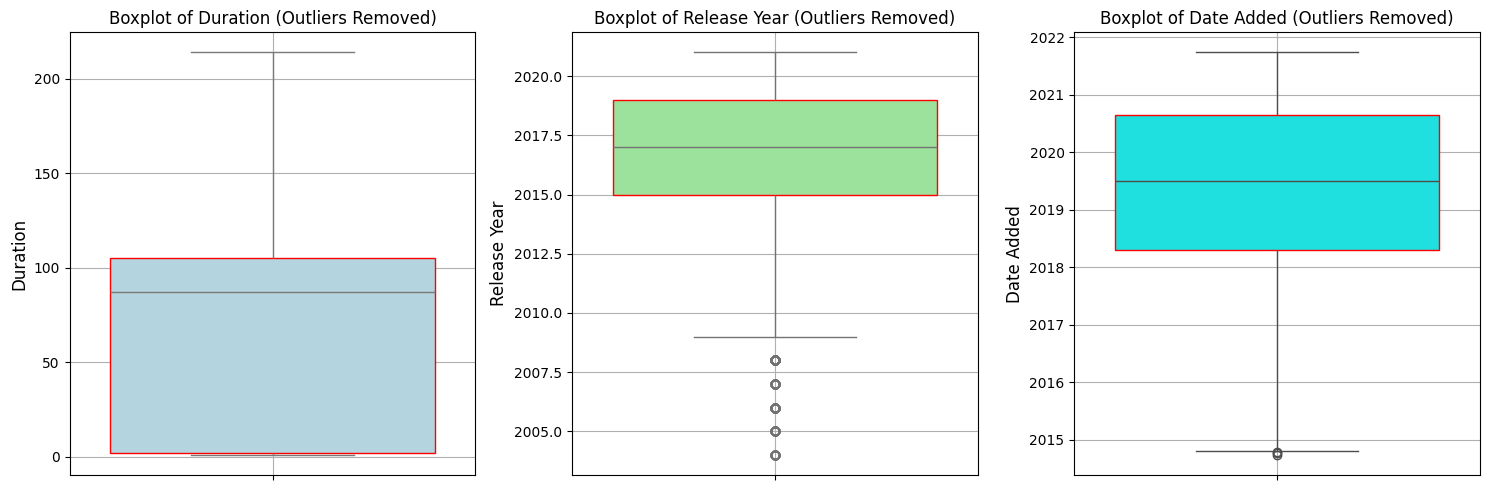

In [62]:
#Calcuting inquartile and removing outliers from 'duration_num'
q1 = dataset['duration_num'].quantile(0.25)
q3 = dataset['duration_num'].quantile(0.75)

iqr = q3-q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

dataset = dataset[(dataset['duration_num'] >= lower_bound) & (dataset['duration_num'] <= upper_bound)]



#Calcuting inquartile and removing outliers from 'release_year'
q1 = dataset['release_year'].quantile(0.25)
q3 = dataset['release_year'].quantile(0.75)

iqr = q3-q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

dataset = dataset[(dataset['release_year'] >= lower_bound) & (dataset['release_year'] <= upper_bound)]




#Calcuting inquartile and removing outliers from 'date_added'
q1 = dataset['date_added'].quantile(0.25)
q3 = dataset['date_added'].quantile(0.75)

iqr = q3-q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

dataset = dataset[(dataset['date_added'] >= lower_bound) & (dataset['date_added'] <= upper_bound)]




#Re-creating boxplots after removing outliers
plt.figure(figsize=(15, 5))

#First Boxplot (For Duration)
plt.subplot(1, 3, 1)
sns.boxplot(y='duration_num', data=dataset, color='lightblue', boxprops=dict(edgecolor='red'))
plt.title('Boxplot of Duration (Outliers Removed)', fontsize=12)
plt.ylabel('Duration', fontsize=12)
plt.grid(True)

#Second Boxplot (for Release Year)
plt.subplot(1, 3, 2)
sns.boxplot(y='release_year', data=dataset, color='lightgreen', boxprops=dict(edgecolor='red'))
plt.title('Boxplot of Release Year (Outliers Removed)', fontsize=12)
plt.ylabel('Release Year', fontsize=12)
plt.grid(True)

#Third Boxplot (for Date added)
plt.subplot(1, 3, 3)
sns.boxplot(y='date_added', data=dataset, color='cyan', boxprops=dict(edgecolor='red'))
plt.title('Boxplot of Date Added (Outliers Removed)', fontsize=12)
plt.ylabel('Date Added', fontsize=12)
plt.grid(True)

# Adjusting spacing and showing plot
plt.tight_layout()
plt.show()

Step 4: Visualization of the dataset.

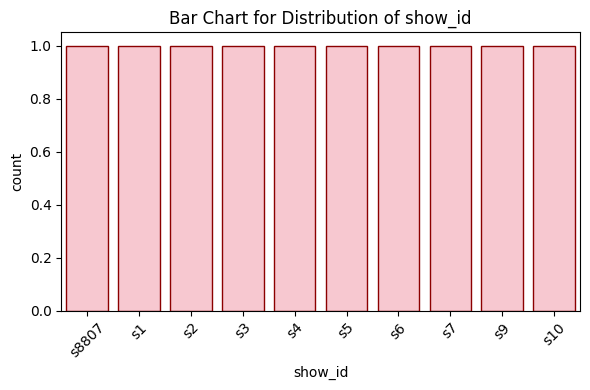

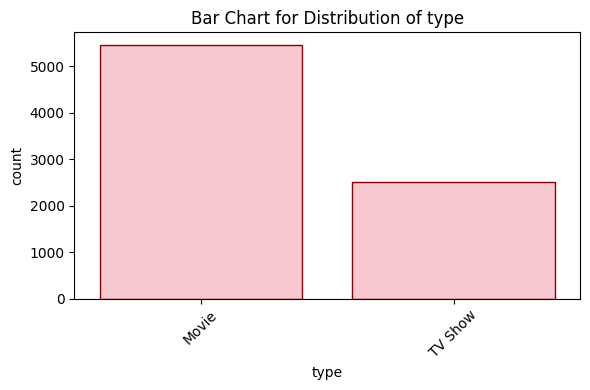

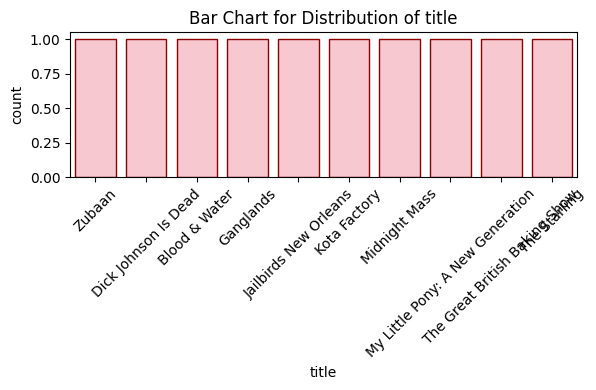

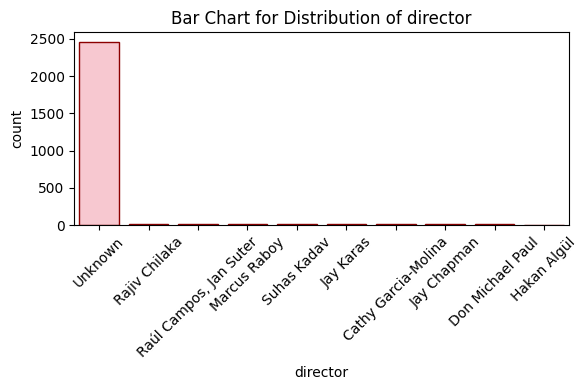

<ipython-input-70-b23a1745137c>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


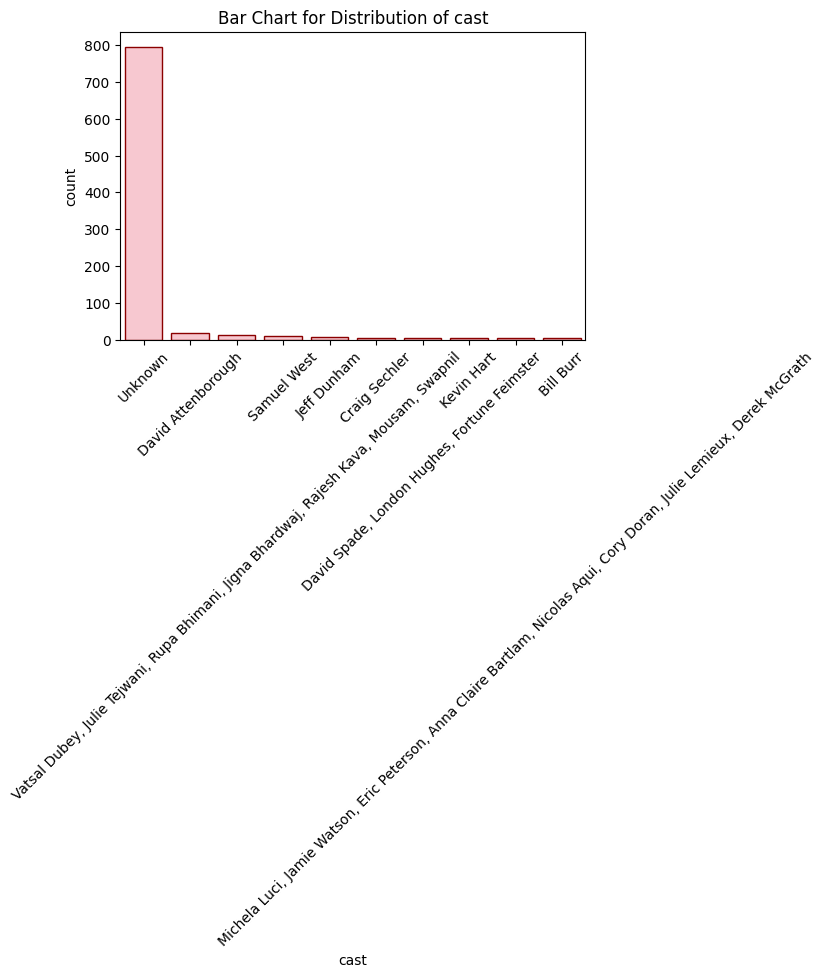

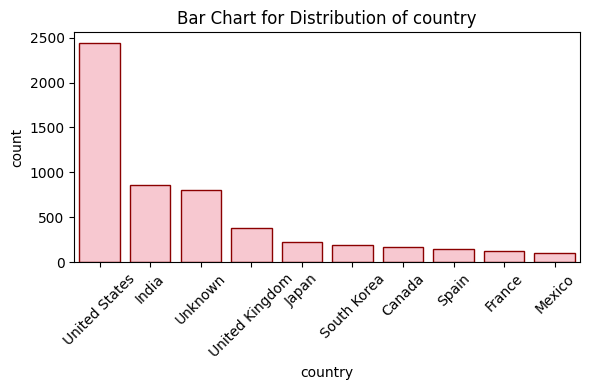

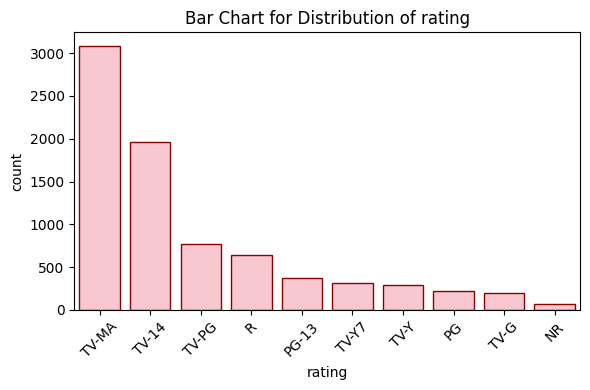

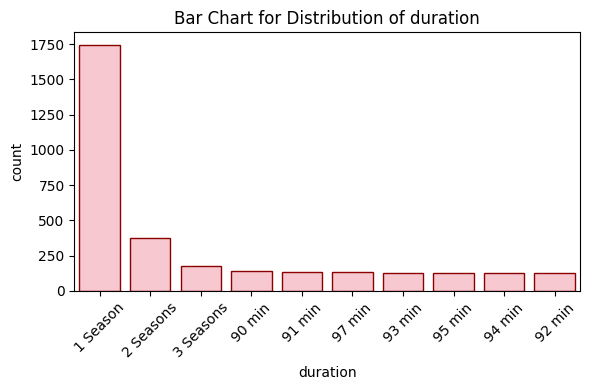

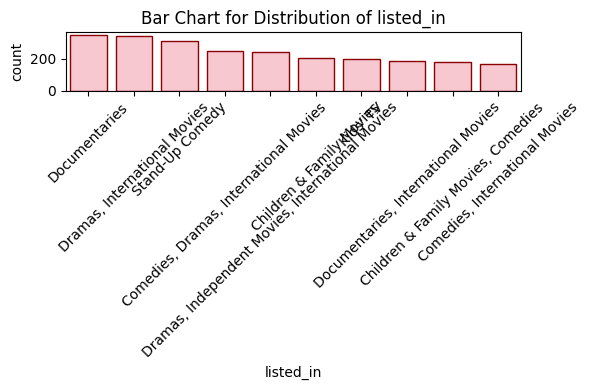

<ipython-input-70-b23a1745137c>:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


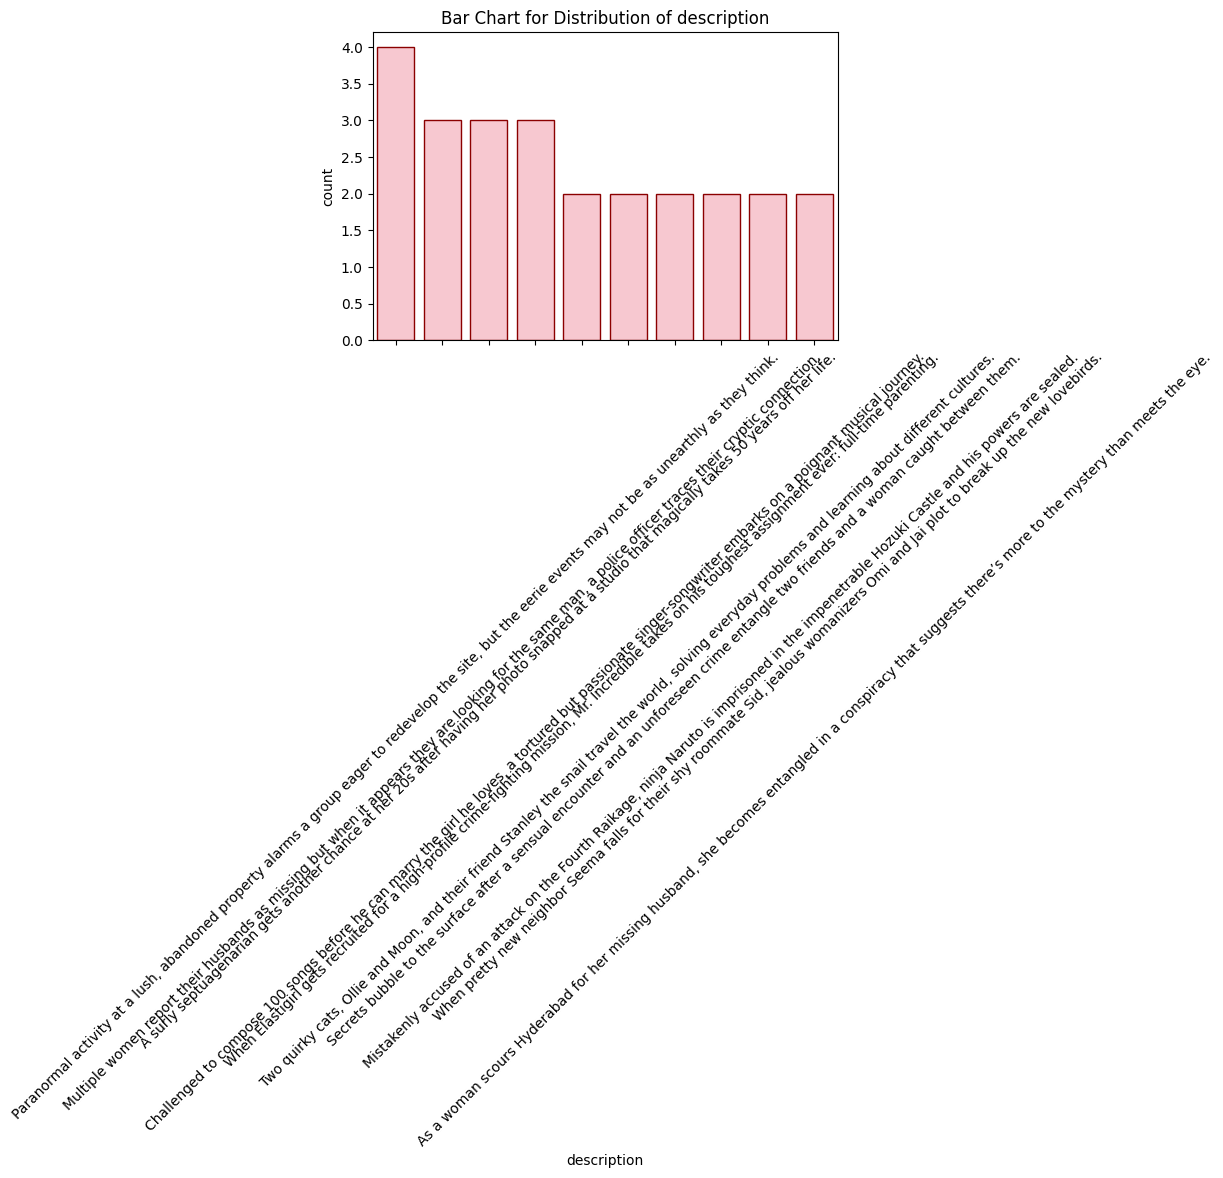

In [70]:
#Creating Bar charts for categorical variables (Top 20)
categorical_var = dataset.select_dtypes(include=['object', 'category']).columns

for col in categorical_var:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=dataset[col], order=dataset[col].value_counts().head(10).index, color='pink', edgecolor='darkred')
    plt.title(f'Bar Chart for Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


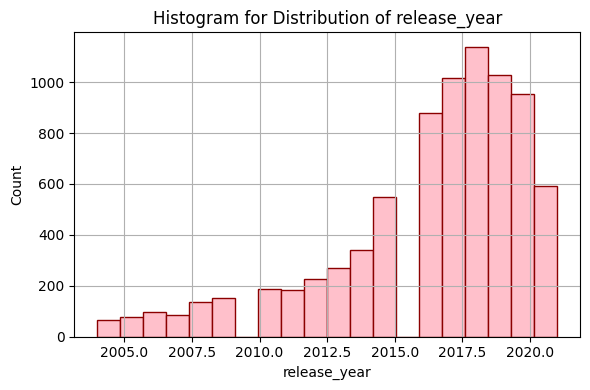

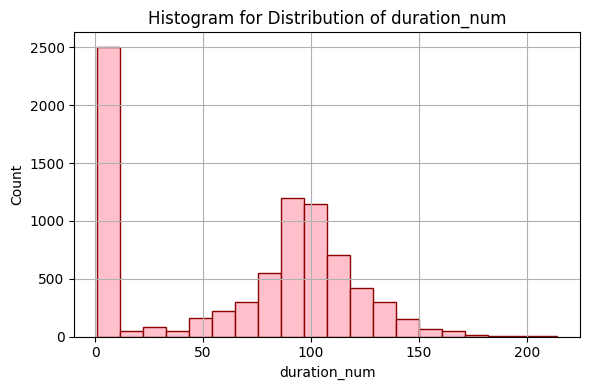

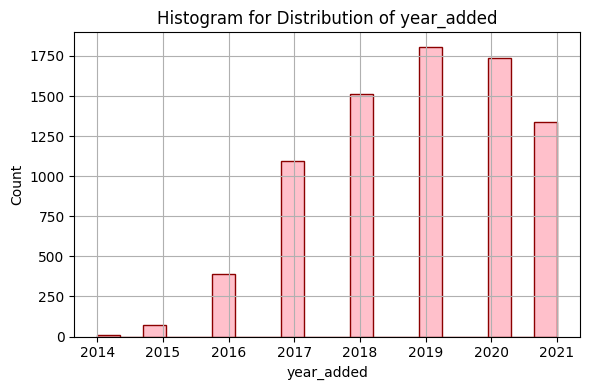

In [71]:
#Creating Histograms for distributions of numeric variables
numeric_distribution = dataset.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_distribution:
    plt.figure(figsize=(6, 4))
    dataset[col].dropna().hist(bins=20, color='pink', edgecolor='darkred')
    plt.title(f'Histogram for Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

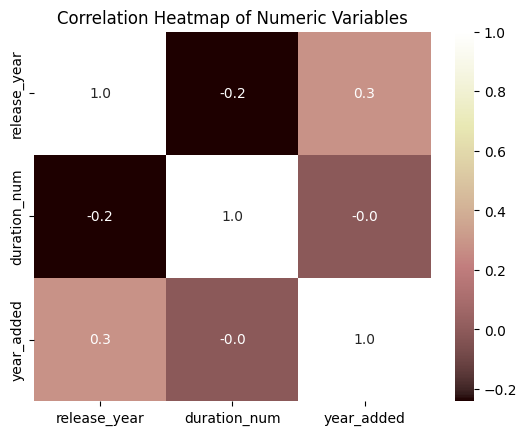

In [72]:
#Creating correlation heatmap for determining strength between the variables in dataset
import numpy as np

numeric_features = dataset.select_dtypes(include=[np.number])
correlation = numeric_features.corr()
sns.heatmap(correlation, annot=True, cmap='pink', fmt=".1f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

1. Dataset Overview:
- Loaded the Netflix dataset containing 8,807 rows and multiple relevant columns such as type, title, director, country, release_year, duration, etc.

- After cleaning and processing, the dataset was prepared for exploration and visualization.


2. Data Cleaning:
- Handled missing values:

- Filled minor null values using mode and forward fill methods.

- Retained the director column despite ~30% missing data, as it may contain useful information.

- Removed duplicate records to ensure data integrity.

- Converted duration to a numerical column duration_num for better analysis.

- Parsed and standardized date_added as datetime.

- Handled outliers in duration_num, release_year, and date_added using the IQR method.


3. Visual Insights:
- Content Type:
The platform contains more Movies than TV Shows, making movies the dominant content type.

- Country:
The USA and India are the top content-producing countries on Netflix.

- Release Year:
Majority of the content was released between 2015 and 2020, indicating a recent expansion of the content library.

- Duration:
Most movies range between 90–100 minutes, aligning with standard movie lengths.
Outliers included very short clips and long films; these were removed for better clarity.

- Date Added:
A large chunk of content was added in recent years, showing Netflix’s active content acquisition.

- Genre (Listed In):
Top genres include International Movies, Dramas, and Comedies.

- Ratings:
Dominated by TV-MA, TV-14, and R, indicating a trend toward mature content.



4. Correlation Analysis:
- No strong correlation between numeric columns.

- A moderate positive correlation between release_year and date_added, indicating that newer shows are more likely to be added recently.

- duration_num showed no significant correlation with release year or other variables.



5. Overall Observations:
- Movies are more prevalent than TV Shows on Netflix.

- Content is internationally diverse, with the USA and India leading.

- Majority of content is targeted at mature audiences.

- Boxplots and histograms were useful to identify outliers and skewness in numeric columns.

- Dataset is now cleaned, visualized, and ready for further modeling, clustering, or insights reporting.

